# **Story-telling of "Sample Superstore Data"**

Created By: Somendra Sarkar

InnoByte Intern ID: IS/A1/A6543

## **Step 1: Data Exploration**

Following processes are done in this step:

1. Importing required python libraries.
2. Loading the Sample Dataset and converting to Dataframe.
3. Checking the Dataframe Structure and the datatypes of the constraints.

In [1]:
# All the imports are here

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import geopandas as gpd
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
# Loading the Sample Dataset and converting to dataframe

df = pd.read_csv('/content/SampleSuperstore.csv')

In [3]:
# Display the 1st few rows of the dataframe

df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# Checking the structure of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.shape

(9994, 13)



---


## **Step 2: Data Cleaning**

Following processes are done in this step:
1. Checking missing values. (None found)
2. Checking duplicate values. (17 in total)
3. Handling duplicate values. (Treated as 'True Duplicates' and removed except 1 row)
4. Checking for any inconsistencies.


*   Certain 'Postal Code' values are not correct (Specially that starts with 0)
*   Hence, to fix this we have to change the datatype of 'Postal Code'to object

5. Resolving the inconsistencies and changing the datatype of that particular column.

In [6]:
# Checking if there is any missing value in the dataframe

missing_values = df.isnull().sum()
print(missing_values)

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [7]:
# Checking for any duplicate value in the dataframe

duplicate_values = df.duplicated().sum()
print(duplicate_values)

17


In [8]:
duplicate_df = df[df.duplicated()]
print(duplicate_df.to_string(index = False))

     Ship Mode     Segment       Country          City        State  Postal Code  Region        Category Sub-Category   Sales  Quantity  Discount   Profit
Standard Class Home Office United States  Philadelphia Pennsylvania        19120    East Office Supplies        Paper  15.552         3       0.2   5.4432
Standard Class Home Office United States      Columbus         Ohio        43229    East       Furniture       Chairs 281.372         2       0.3 -12.0588
Standard Class    Consumer United States         Salem       Oregon        97301    West Office Supplies        Paper  10.368         2       0.2   3.6288
Standard Class    Consumer United States   Los Angeles   California        90036    West Office Supplies        Paper  19.440         3       0.0   9.3312
Standard Class    Consumer United States San Francisco   California        94122    West Office Supplies        Paper  12.840         3       0.0   5.7780
      Same Day Home Office United States San Francisco   California   

In [9]:
# Removing duplicates (Keeping atleas one)

df.drop_duplicates(inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [10]:
# Certain Row Value Finder

input_data = {
    #'Ship Mode': 'Standard Class',
    #'Segment': 'Consumer',
    #'Country': 'United States',
    'City': 'Burlington',
    'State': 'Vermont',
    #'Postal Code': 97301,
    #'Region': 'West',
    #'Category': 'Office Supplies',
    #'Sub-Category': 'Paper',
    #'Sales': 15.0,
    #'Quantity': 2,
    #'Discount': 0.1,
    #'Profit': 5.0
}

input_df = pd.DataFrame([input_data])

condition = True
for col, value in input_data.items():
    condition &= (df[col] == value)

result = df[condition]

print("Rows matching input data:")
print(result.to_string(index = False))

Rows matching input data:
     Ship Mode     Segment       Country       City   State  Postal Code Region        Category Sub-Category   Sales  Quantity  Discount    Profit
Standard Class   Corporate United States Burlington Vermont         5408   East      Technology  Accessories  205.03         7       0.0   67.6599
  Second Class    Consumer United States Burlington Vermont         5408   East       Furniture       Chairs  715.20         3       0.0  178.8000
Standard Class Home Office United States Burlington Vermont         5408   East      Technology       Phones 1294.75         5       0.0  336.6350
Standard Class   Corporate United States Burlington Vermont         5408   East      Technology  Accessories   99.98         2       0.0   42.9914
Standard Class   Corporate United States Burlington Vermont         5408   East Office Supplies          Art    8.04         6       0.0    2.7336
Standard Class   Corporate United States Burlington Vermont         5408   East Office Suppl

In [11]:
# Converting the data type of 'Postal Code'

df['Postal Code'] = df['Postal Code'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   object 
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


In [12]:
#Filling with new values in place of inconsistant values

true_value = '05408'

df.loc[(df['Country'] == 'United States') &
       (df['City'] == 'Burlington') &
       (df['State'] == 'Vermont'), 'Postal Code'] = true_value



---


## **Step 3: Descriptive Statistics**

Before proceeding, Let's know our dataset:

1. This dataset has 13 contraints.
2. We can again categorize this 13 constraints into atleast 4 categories.


*   Shipment - 'Ship Mode'
*   Customer - 'Segment'

*   Geographical Location - 'Country', 'City', 'State', 'Region', 'Postal Code'
*   Numerical Values - 'Sales','Quantity', 'Discount', 'Profit'

Here, We can analyse the datasets in many ways by combining the constraints of those sets (categories).

For Example:
1. Numericals **VS** Geographical Location:

  'Sales' or 'Quantity' or 'Discount' or 'Profit' **VS** 'City' or 'State' or 'Region'

2. Numericals **VS** Customer:

  'Sales' or 'Quantity' or 'Discount' or 'Profit' **VS** 'Segments'

3. Numericals **VS** Numericals:

  'Sales' or 'Quantity' or 'Discount' or 'Profit' **VS** 'Sales' or 'Quantity' or 'Discount' or 'Profit' (Ommiting the comparison of same constraints)

Possibilities are not endless but we don't need all...

In this Step, following processes are done:

1. Finding the total number of unique values for each constraint.
2. Listing all the unique values.
3. Finding the most frequent value for each constraint.
4. Calculating basic descriptive statistics for key metrics
5. Finding total sales, total profit, total negative profit(Loss), Actual profit/loss, total quantity sold, average order value, average profit value, average discount value and average quantity value.
6. Finding profit margin
7. Finding discount distribution
8. Finding correlation among 'Sales', 'Profit', and 'Quantity'
9. Distribution of 'Sales', 'Profit' and 'Quantity' over frequency.**(Visualisation)**


In [13]:
# Show the total number of unique values for each column
unique_counts = df.nunique()
print("Total number of unique values for each column:")
print(unique_counts)
print()

# List all unique values with count for each column
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts()
    print(f"Unique values with count for column '{col}':")
    print(unique_values[col])
    print()

# Show the most frequent value for each column
most_frequent = {}
for col in df.columns:
    most_frequent[col] = df[col].mode()[0]
    print(f"Most frequent value for column '{col}': {most_frequent[col]}")
    print()

# Calculate basic descriptive statistics for key metrics
print("Basic descriptive statistics for key metrics:")
descriptive_statistics = df.describe()
print(descriptive_statistics)
print()


Total number of unique values for each column:
Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

Unique values with count for column 'Ship Mode':
Ship Mode
Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: count, dtype: int64

Unique values with count for column 'Segment':
Segment
Consumer       5183
Corporate      3015
Home Office    1779
Name: count, dtype: int64

Unique values with count for column 'Country':
Country
United States    9977
Name: count, dtype: int64

Unique values with count for column 'City':
City
New York City      914
Los Angeles        746
Philadelphia       536
San Francisco      506
Seattle            424
                  ... 
Glenview             1
Missouri City        1
Rochester

In [14]:
# Total sales
total_sales = df['Sales'].sum()

# Total profit
total_profit = df['Profit'].sum()

# Total loss (negative profit)
total_loss = df[df['Profit'] < 0]['Profit'].sum()

# Actual profit (considering both profit and loss)
actual_profit = total_profit - total_loss

# Total quantity sold
total_quantity_sold = df['Quantity'].sum()

# Average order value
average_order_value = total_sales / len(df)

# Average profit value
average_profit_value = df['Profit'].mean()

# Average discount value
average_discount_value = df['Discount'].mean()

# Average quantity value
average_quantity_value = df['Quantity'].mean()

# Print the calculated metrics
print("Total Sales:", total_sales)
print("Total Profit:", total_profit)
print("Total Loss:", total_loss)
print("Actual Profit/Loss:", actual_profit)
print("Total Quantity Sold:", total_quantity_sold)
print("Average Order Value:", average_order_value)
print("Average Profit Value:", average_profit_value)
print("Average Discount Value:", average_discount_value)
print("Average Quantity Value:", average_quantity_value)


Total Sales: 2296195.5903
Total Profit: 286241.4226
Total Loss: -156112.98990000002
Actual Profit/Loss: 442354.4125
Total Quantity Sold: 37820
Average Order Value: 230.14890150345792
Average Profit Value: 28.69012955798336
Average Discount Value: 0.1562784404129498
Average Quantity Value: 3.7907186529016736


In [15]:
# Profit Margin
profit_margin = (total_profit / total_sales) * 100  # Profit margin as a percentage
print("Profit Margin:", profit_margin)

# Discount Distribution
discount_distribution = df['Discount'].value_counts(normalize=True)
print("\nDiscount Distribution:")
print(discount_distribution)

# Correlation among 'Sales', 'Profit', and 'Quantity'
correlation_subset = df[['Sales', 'Profit', 'Quantity']].corr()
print("\nCorrelation Matrix for 'Sales', 'Profit', and 'Quantity':")
print(correlation_subset)

Profit Margin: 12.465898976950927

Discount Distribution:
Discount
0.00    0.479804
0.20    0.366142
0.70    0.041896
0.80    0.029969
0.30    0.022652
0.40    0.020647
0.60    0.013832
0.10    0.009422
0.50    0.006615
0.15    0.005212
0.32    0.002706
0.45    0.001103
Name: proportion, dtype: float64

Correlation Matrix for 'Sales', 'Profit', and 'Quantity':
             Sales    Profit  Quantity
Sales     1.000000  0.479067  0.200722
Profit    0.479067  1.000000  0.066211
Quantity  0.200722  0.066211  1.000000


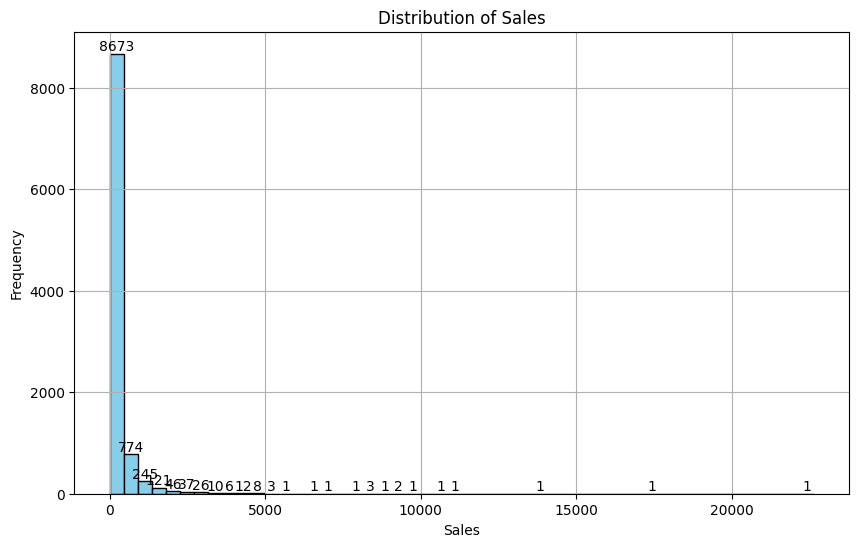

In [16]:
#Distribution of given constraints over Frequency

# Distribution of Sales
plt.figure(figsize=(10, 6))
hist_sales, bins_sales, _ = plt.hist(df['Sales'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
#plt.xlim(0, 5000)
for bin_value, frequency in zip(bins_sales, hist_sales):
    if frequency > 0:
        plt.text(bin_value + (bins_sales[1] - bins_sales[0]) / 2, frequency, str(int(frequency)), ha='center', va='bottom')
plt.show()

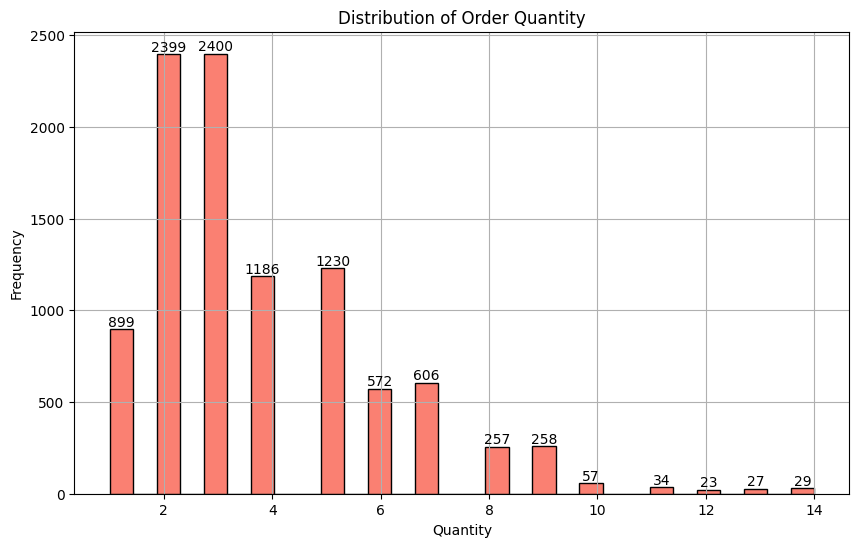

In [17]:
# Distribution of Order Quantity
plt.figure(figsize=(10, 6))
hist_quantity, bins_quantity, _ = plt.hist(df['Quantity'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Order Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(True)
for bin_value, frequency in zip(bins_quantity, hist_quantity):
    if frequency > 0:
        plt.text(bin_value + (bins_quantity[1] - bins_quantity[0]) / 2, frequency, str(int(frequency)), ha='center', va='bottom')
plt.show()

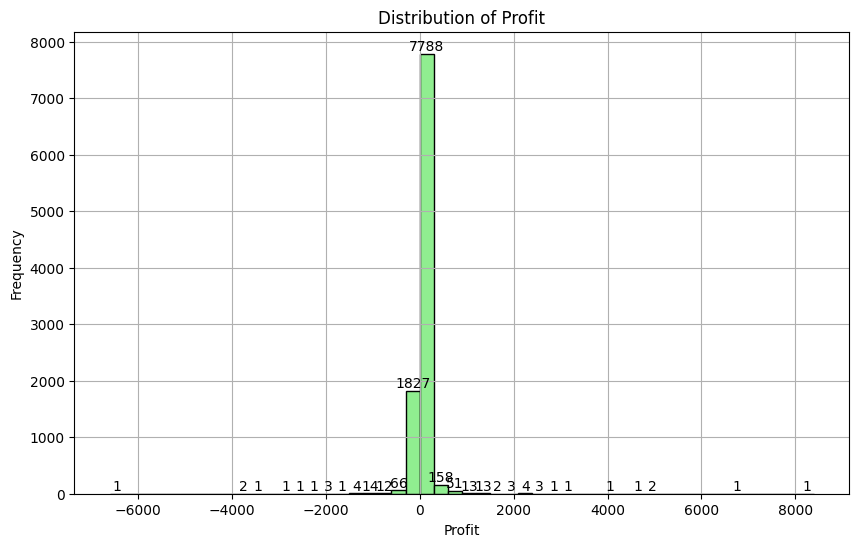

In [18]:
# Distribution of Profit
plt.figure(figsize=(10, 6))
hist_profit, bins_profit, _ = plt.hist(df['Profit'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.grid(True)
#plt.xlim(-2000, 2000)
for bin_value, frequency in zip(bins_profit, hist_profit):
    if frequency > 0:
        plt.text(bin_value + (bins_profit[1] - bins_profit[0]) / 2, frequency, str(int(frequency)), ha='center', va='bottom')
plt.show()




---

## Step 4: Geospatial Analysis

In this step, the important geographical location based constraints like 'Region','City' and 'State' are compared against numerical constraints like 'Sales','Profit' and 'Quantity'.

And also added the GeoPandas library to plot the total sales in The US State map.


In [19]:
# Geographical Analysis based on 'Region'
if 'Region' in df.columns:
    regional_analysis = df.groupby('Region').agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Quantity': 'sum'
    })
    print("\nGeographical Analysis on 'Region':")
    print(regional_analysis)
else:
    print("\nNo 'Region' column found in the dataset.")

# Geographical Analysis based on 'State'
if 'State' in df.columns:
    regional_analysis = df.groupby('State').agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Quantity': 'sum'
    })
    print("\nGeographical Analysis on 'State':")
    print(regional_analysis)
else:
    print("\nNo 'State' column found in the dataset.")

# Geographical Analysis based on 'City'
if 'City' in df.columns:
    regional_analysis = df.groupby('City').agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Quantity': 'sum'
    })
    print("\nGeographical Analysis on 'City':")
    print(regional_analysis)
else:
    print("\nNo 'City' column found in the dataset.")



Geographical Analysis on 'Region':
               Sales       Profit  Quantity
Region                                     
Central  500782.8528   39655.8752      8768
East     678435.1960   91506.3092     10609
South    391721.9050   46749.4303      6209
West     725255.6365  108329.8079     12234

Geographical Analysis on 'State':
                            Sales      Profit  Quantity
State                                                  
Alabama                19510.6400   5786.8253       256
Arizona                35282.0010  -3427.9246       862
Arkansas               11678.1300   4008.6871       240
California            457576.2715  76330.7891      7649
Colorado               32108.1180  -6527.8579       693
Connecticut            13384.3570   3511.4918       281
Delaware               27451.0690   9977.3748       367
District of Columbia    2865.0200   1059.5893        40
Florida                89473.7080  -3399.3017      1379
Georgia                49095.8400  16250.0433    

In [20]:
# Load US states shapefile
us_states = gpd.read_file("/content/US_State_Boundaries.shp")
us_states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         53 non-null     int64   
 1   OBJECTID    53 non-null     int64   
 2   NAME        53 non-null     object  
 3   STATE_ABBR  53 non-null     object  
 4   STATE_FIPS  53 non-null     object  
 5   ORDER_ADM   53 non-null     int64   
 6   MONTH_ADM   50 non-null     object  
 7   DAY_ADM     53 non-null     int64   
 8   YEAR_ADM    53 non-null     int64   
 9   TYPE        53 non-null     object  
 10  POP         53 non-null     int64   
 11  SQ_MILES    53 non-null     float64 
 12  PRIM_MILES  53 non-null     float64 
 13  Shape_Leng  53 non-null     float64 
 14  Shape__Are  53 non-null     float64 
 15  Shape__Len  53 non-null     float64 
 16  geometry    53 non-null     geometry
dtypes: float64(5), geometry(1), int64(6), object(5)
memory usage: 7.2+ KB


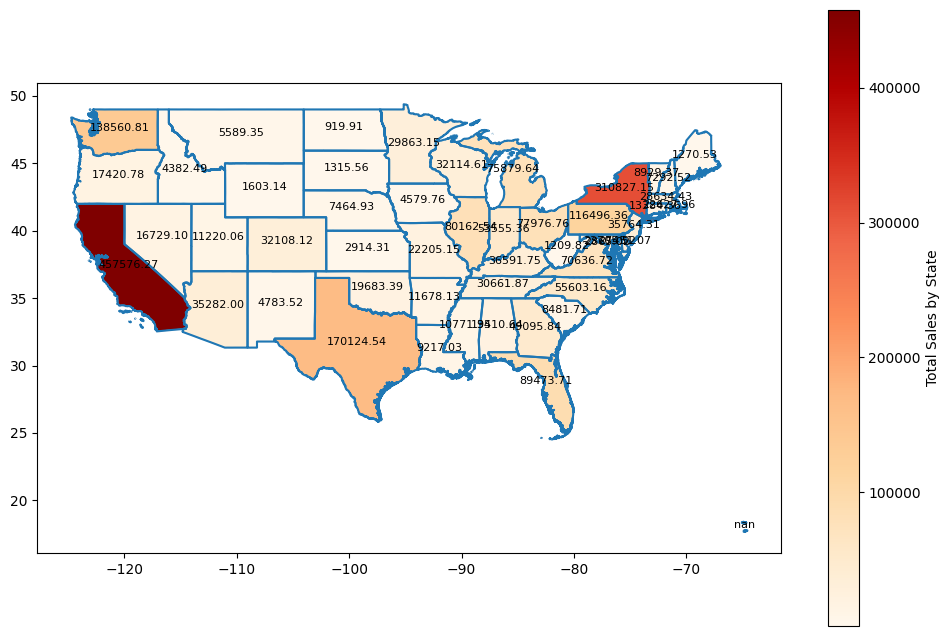

In [21]:
# List of states to remove (including Alaska and islands)
states_to_remove = ['Alaska', 'Hawaii', 'Puerto Rico', 'Guam', 'Virgin Islands', 'American Samoa', 'Northern Mariana Islands']

# Filter out states to remove
us_states = us_states[~us_states['NAME'].isin(states_to_remove)]

# Group by state and calculate total sales for each state
state_sales = df.groupby('State')['Sales'].sum().reset_index()

# Merge the total sales data with the US states shapefile based on state names
merged = us_states.merge(state_sales, how='left', left_on='NAME', right_on='State')

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the figure size
us_states.boundary.plot(ax=ax)
merged.plot(column='Sales', ax=ax, legend=True,
            legend_kwds={'label': "Total Sales by State"},
            cmap='OrRd', linewidth=0.8, edgecolor='0.8')

# Add annotations for total sales above each state
for idx, row in merged.iterrows():
    state_name = row['NAME']
    total_sales = row['Sales']
    centroid_x, centroid_y = row['geometry'].centroid.x, row['geometry'].centroid.y
    ax.text(centroid_x, centroid_y, f'{total_sales:.2f}', fontsize=8, ha='center')

plt.show()

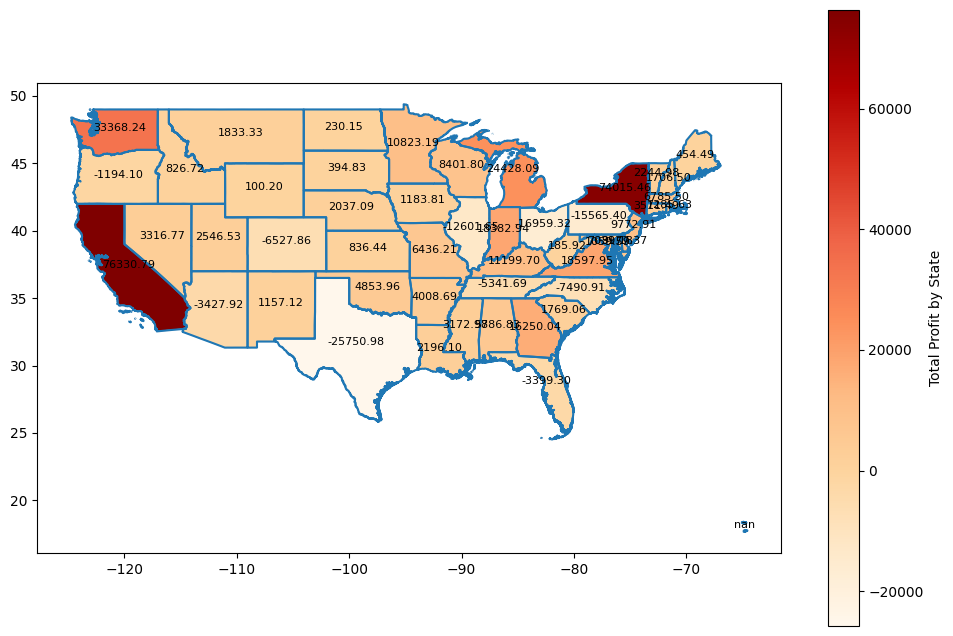

In [22]:
# List of states to remove (including Alaska and islands)
states_to_remove = ['Alaska', 'Hawaii', 'Puerto Rico', 'Guam', 'Virgin Islands', 'American Samoa', 'Northern Mariana Islands']

# Filter out states to remove
us_states = us_states[~us_states['NAME'].isin(states_to_remove)]

# Group by state and calculate total profit for each state
state_profit = df.groupby('State')['Profit'].sum().reset_index()

# Merge the total profit data with the US states shapefile based on state names
merged = us_states.merge(state_profit, how='left', left_on='NAME', right_on='State')

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the figure size
us_states.boundary.plot(ax=ax)
merged.plot(column='Profit', ax=ax, legend=True,
            legend_kwds={'label': "Total Profit by State"},
            cmap='OrRd', linewidth=0.8, edgecolor='0.8')

# Add annotations for total profit above each state
for idx, row in merged.iterrows():
    state_name = row['NAME']
    total_profit = row['Profit']
    centroid_x, centroid_y = row['geometry'].centroid.x, row['geometry'].centroid.y
    ax.text(centroid_x, centroid_y, f'{total_profit:.2f}', fontsize=8, ha='center')

plt.show()


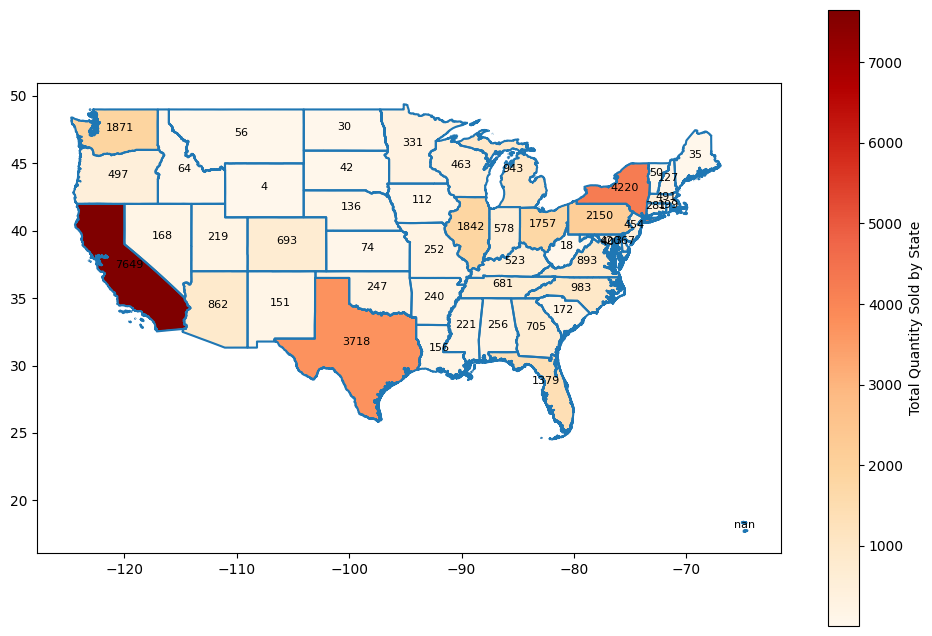

In [23]:
# List of states to remove (including Alaska and islands)
states_to_remove = ['Alaska', 'Hawaii', 'Puerto Rico', 'Guam', 'Virgin Islands', 'American Samoa', 'Northern Mariana Islands']

# Filter out states to remove
us_states = us_states[~us_states['NAME'].isin(states_to_remove)]

# Group by state and calculate total quantity sold for each state
state_quantity = df.groupby('State')['Quantity'].sum().reset_index()

# Merge the total quantity data with the US states shapefile based on state names
merged = us_states.merge(state_quantity, how='left', left_on='NAME', right_on='State')

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the figure size
us_states.boundary.plot(ax=ax)
merged.plot(column='Quantity', ax=ax, legend=True,
            legend_kwds={'label': "Total Quantity Sold by State"},
            cmap='OrRd', linewidth=0.8, edgecolor='0.8')

# Add annotations for total quantity sold above each state
for idx, row in merged.iterrows():
    state_name = row['NAME']
    total_quantity = row['Quantity']
    centroid_x, centroid_y = row['geometry'].centroid.x, row['geometry'].centroid.y
    ax.text(centroid_x, centroid_y, f'{total_quantity:.0f}', fontsize=8, ha='center')

plt.show()




---


#Step 5: Product Category and Sub-Category Analysis

Following processes took place in this step:

1. Finding most popular product category w.r.t geographical location constraints.
2. Finding most popular product sub-category w.r.t geographical location constraints.
3. Finding most popular product category w.r.t 'Segment' constraints.
4. Finding most popular product sub-category w.r.t 'Segment' constraints.

In [24]:
# Showing the most popular category w.r.t geographical locations

popular_category_by_region = df.groupby('Region')['Category'].apply(lambda x: x.mode().iloc[0])
popular_category_by_state = df.groupby('State')['Category'].apply(lambda x: x.mode().iloc[0])
popular_category_by_city = df.groupby('City')['Category'].apply(lambda x: x.mode().iloc[0])

print("Most Popular Product Category by Region:")
print(popular_category_by_region)
print("\nMost Popular Product Category by State:")
print(popular_category_by_state)
print("\nMost Popular Product Category by City:")
print(popular_category_by_city)

Most Popular Product Category by Region:
Region
Central    Office Supplies
East       Office Supplies
South      Office Supplies
West       Office Supplies
Name: Category, dtype: object

Most Popular Product Category by State:
State
Alabama                 Office Supplies
Arizona                 Office Supplies
Arkansas                Office Supplies
California              Office Supplies
Colorado                Office Supplies
Connecticut             Office Supplies
Delaware                Office Supplies
District of Columbia    Office Supplies
Florida                 Office Supplies
Georgia                 Office Supplies
Idaho                   Office Supplies
Illinois                Office Supplies
Indiana                 Office Supplies
Iowa                    Office Supplies
Kansas                  Office Supplies
Kentucky                Office Supplies
Louisiana               Office Supplies
Maine                   Office Supplies
Maryland                Office Supplies
Massach

In [25]:
# Showing the most popular sub-category w.r.t geographical locations

popular_sub_category_by_region = df.groupby('Region')['Sub-Category'].apply(lambda x: x.mode().iloc[0])
popular_sub_category_by_state = df.groupby('State')['Sub-Category'].apply(lambda x: x.mode().iloc[0])
popular_sub_category_by_city = df.groupby('City')['Sub-Category'].apply(lambda x: x.mode().iloc[0])

print("Most Popular Product Sub-Category by Region:")
print(popular_sub_category_by_region)
print("\nMost Popular Product Sub-Category by State:")
print(popular_sub_category_by_state)
print("\nMost Popular Product Sub-Category by City:")
print(popular_sub_category_by_city)

Most Popular Product Sub-Category by Region:
Region
Central    Binders
East       Binders
South      Binders
West       Binders
Name: Sub-Category, dtype: object

Most Popular Product Sub-Category by State:
State
Alabama                     Binders
Arizona                     Binders
Arkansas                      Paper
California                    Paper
Colorado                    Binders
Connecticut                 Binders
Delaware                    Binders
District of Columbia          Paper
Florida                     Binders
Georgia                       Paper
Idaho                       Binders
Illinois                    Binders
Indiana                       Paper
Iowa                        Binders
Kansas                          Art
Kentucky                    Binders
Louisiana               Accessories
Maine                   Accessories
Maryland                Furnishings
Massachusetts                 Paper
Michigan                    Binders
Minnesota                   Bin



---

## Step 6: Customer Segmentation

In this step, following processes are invoked:

1. Finding the most popular product category and sub-category w.r.t 'Segment' (Customer) constraint.
2. Examining the segments based on there purchasing behaviour.
3. Sales analysis with segment.
4. Profit analysis with segment.
5. Quantity analysis with segment.
6. Discount analysis with segment.
7. Customer count by segment.

In [26]:
# Finding most popular product category and sub-category w.r.t 'Segment' constraints.

popular_category_by_segment = df.groupby('Segment')['Category'].apply(lambda x: x.mode().iloc[0])
print("Most Popular Product Category by Segment:")
print(popular_category_by_segment)

popular_sub_category_by_segment = df.groupby('Segment')['Sub-Category'].apply(lambda x: x.mode().iloc[0])
print("Most Popular Product Sub-Category by Segment:")
print(popular_sub_category_by_segment)

Most Popular Product Category by Segment:
Segment
Consumer       Office Supplies
Corporate      Office Supplies
Home Office    Office Supplies
Name: Category, dtype: object
Most Popular Product Sub-Category by Segment:
Segment
Consumer       Binders
Corporate      Binders
Home Office    Binders
Name: Sub-Category, dtype: object


In [27]:
customer_segments = df.groupby('Segment').agg({'Sales': 'sum'}).reset_index()
high_value_customers = customer_segments[customer_segments['Sales'] > customer_segments['Sales'].mean()]

# Analyze the characteristics of each customer segment

segment_characteristics = df.groupby(['Segment', 'Region']).size().unstack(fill_value=0)

# Sales Analysis by Segment
sales_analysis = df.groupby('Segment')['Sales'].sum()

# Profit Analysis by Segment
profit_analysis = df.groupby('Segment')['Profit'].sum()

# Quantity Analysis by Segment
quantity_analysis = df.groupby('Segment')['Quantity'].sum()

# Discount Analysis by Segment
discount_analysis = df.groupby('Segment')['Discount'].mean()

# Customer Count by Segment
customer_count = df['Segment'].value_counts()

print("High-Value Customers:")
print(high_value_customers)
print("\nCharacteristics of Each Customer Segment:")
print(segment_characteristics)
print("\nSales Analysis by Segment:")
print(sales_analysis)
print("\nProfit Analysis by Segment:")
print(profit_analysis)
print("\nQuantity Analysis by Segment:")
print(quantity_analysis)
print("\nDiscount Analysis by Segment:")
print(discount_analysis)
print("\nCustomer Count by Segment:")
print(customer_count)

High-Value Customers:
    Segment        Sales
0  Consumer  1160832.775

Characteristics of Each Customer Segment:
Region       Central  East  South  West
Segment                                
Consumer        1210  1468    838  1667
Corporate        671   877    510   957
Home Office      438   500    272   569

Sales Analysis by Segment:
Segment
Consumer       1.160833e+06
Corporate      7.060701e+05
Home Office    4.292927e+05
Name: Sales, dtype: float64

Profit Analysis by Segment:
Segment
Consumer       134007.4413
Corporate       91954.9798
Home Office     60279.0015
Name: Profit, dtype: float64

Quantity Analysis by Segment:
Segment
Consumer       19497
Corporate      11591
Home Office     6732
Name: Quantity, dtype: int64

Discount Analysis by Segment:
Segment
Consumer       0.158308
Corporate      0.158159
Home Office    0.147178
Name: Discount, dtype: float64

Customer Count by Segment:
Segment
Consumer       5183
Corporate      3015
Home Office    1779
Name: count, dtype: i



---


## Step 7: Cluster Analysis

In this step, Let's focus on some cluster analysis of numerical data of 'Sales' and 'Profit'

1. We have to find the optimal value of K for K-means clustering using elbow method.
2. We will use inertia and distortion to find K.
3. Performing K-Means clustering of optimum value of k.

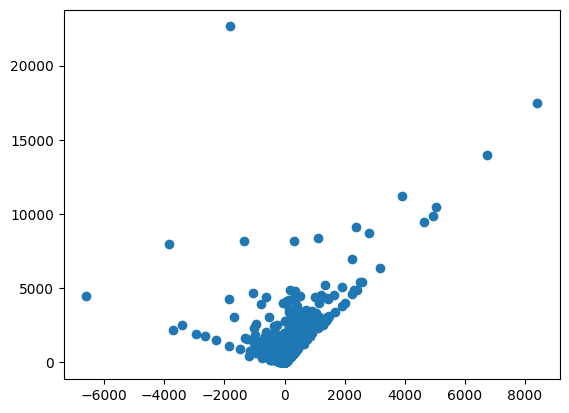

In [28]:
#Ploting the data points usinf scatterplot

plt.scatter(df['Profit'],df['Sales'])

In [29]:
X = df[['Profit', 'Sales']]

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, n_init = 10).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

# Print distortions and inertias
print("Distortions:")
print(distortions)
print("\nInertias:")
print(inertias)

Distortions:
[283.65770789076265, 234.72513013611467, 187.32427812783735, 145.68824195215274, 142.26142654707996, 113.81916927224927, 109.32434379214725, 108.35244373037995, 98.44742882981312]

Inertias:
[4429332775.469154, 2466200416.6997085, 1444041746.879233, 1010036851.7350792, 816295220.518908, 658402320.378886, 565085552.7208807, 458438535.34132314, 386659622.8569226]


In [30]:
# Using The Value of Distortion
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 283.65770789076265
2 : 234.72513013611467
3 : 187.32427812783735
4 : 145.68824195215274
5 : 142.26142654707996
6 : 113.81916927224927
7 : 109.32434379214725
8 : 108.35244373037995
9 : 98.44742882981312


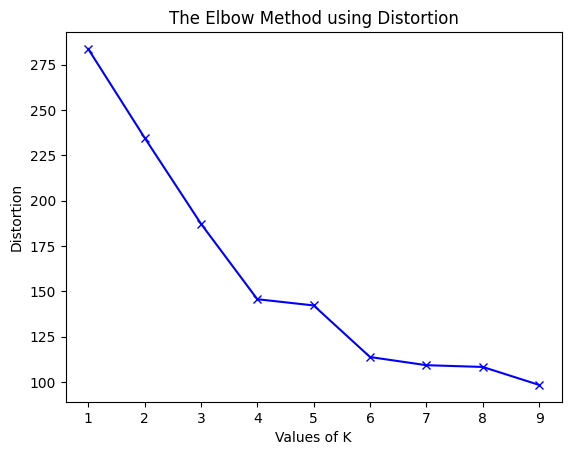

In [31]:
#Plotting the elbow method using distortion
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [32]:
# Using the values of inertia
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 4429332775.469154
2 : 2466200416.6997085
3 : 1444041746.879233
4 : 1010036851.7350792
5 : 816295220.518908
6 : 658402320.378886
7 : 565085552.7208807
8 : 458438535.34132314
9 : 386659622.8569226


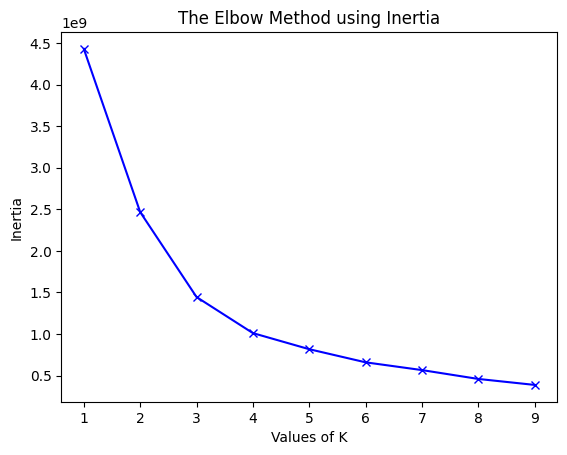

In [33]:
#plotting the elbow method using inertia
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

**To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia starts decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 4.**

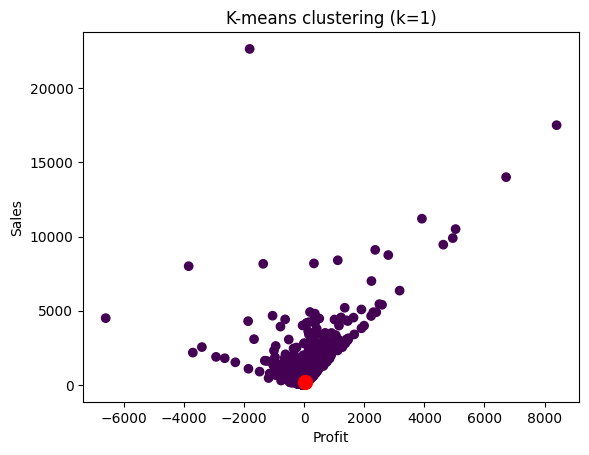

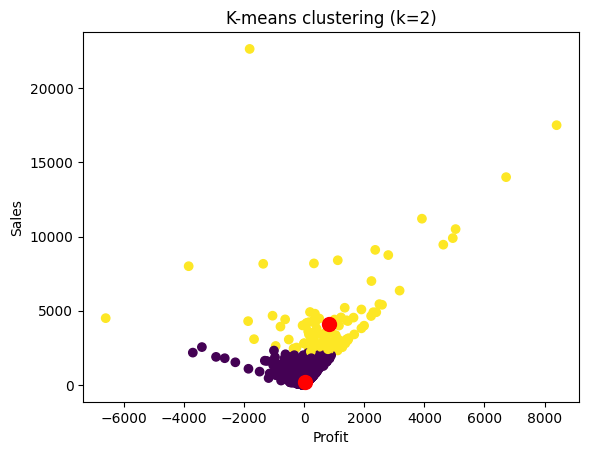

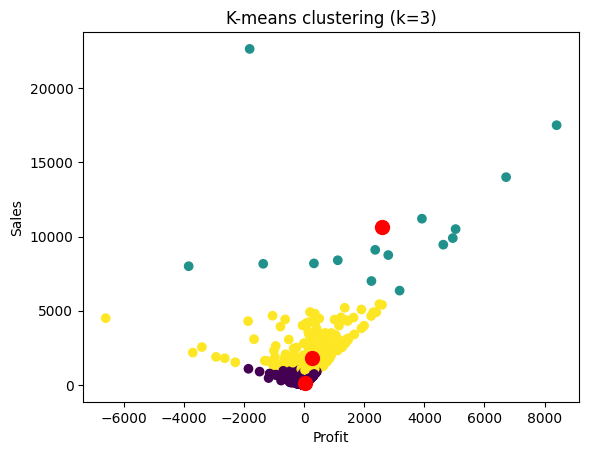

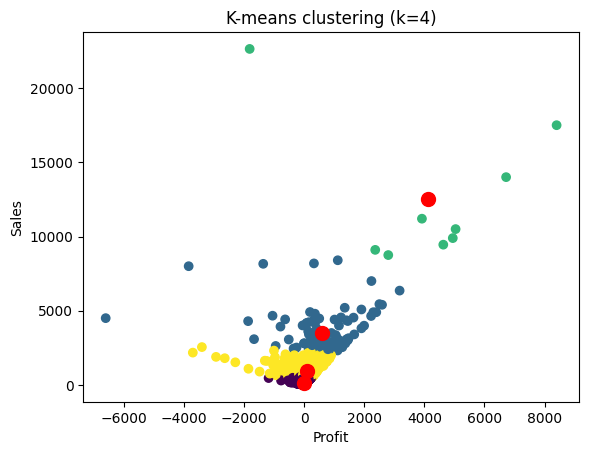

In [34]:
# Create a range of values for k
k_range = range(1, 5)

# Initialize an empty list to store the inertia values for each k
inertia_values = []

# Fit and plot the data for each k value
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init = 10)
    #X = df[['Profit', 'Sales']]  # Select 'Profit' and 'Sales' columns
    y_kmeans = kmeans.fit_predict(X)
    inertia_values.append(kmeans.inertia_)
    plt.scatter(df['Profit'], df['Sales'], c=y_kmeans)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
    plt.title('K-means clustering (k={})'.format(k))
    plt.xlabel('Profit')
    plt.ylabel('Sales')
    plt.show()


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   object 
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


In [36]:
#df.to_csv('/content/SampleSuperstoreCleaned.csv', index=False)



---


## Step 8: Predictive Analysis

A RandomForestRegressor algorithm is used for predictive modeling. RandomForestRegressor is an ensemble learning method based on decision trees, specifically designed for regression tasks. It builds multiple decision trees during training and outputs the average prediction of the individual trees for regression problems.

Here's a breakdown of the steps involved:

1. **Data Preparation:** The data is grouped by 'State', and the total sales for each state are calculated.
2. Feature and Target Variable Definition: The feature variable 'X' consists of the states, and the target variable 'y' consists of the total sales for each state.
3. **Preprocessing:** One-hot encoding is applied to convert categorical variables ('State') into numerical representations. This is necessary because machine learning models typically cannot directly handle string values.
4. **Model Training:** The RandomForestRegressor model is initialized with 100 decision trees (n_estimators=100) and trained on the features 'X' and target variable 'y'.
5. **Prediction:** Future sales for each state are predicted using the trained model for all unique states present in the dataset.
6. **Result Visualization:** The predicted future sales for each state are displayed in a DataFrame.


Random forest is a popular algorithm for regression tasks due to its ability to handle non-linear relationships, high-dimensional data, and interactions between features effectively. It also provides built-in mechanisms for feature importance estimation and handles outliers and missing values well.

In [37]:
# Grouping data by 'State' and calculating total sales for each state
state_sales = df.groupby('State')['Sales'].sum().reset_index()

# Features and target variable
X = state_sales.drop(['Sales'], axis=1)  # Features (we only have 'State')
y = state_sales['Sales']  # Target variable (total sales)

# Preprocessing: One-hot encode the 'State' column
preprocessor = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), ['State'])], remainder='passthrough')

# Model training
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

model.fit(X, y)  # Train the model

# Future predictions for total sales of each state
future_states = pd.DataFrame({'State': df['State'].unique()})  # All unique states in the dataset
future_sales = model.predict(future_states)  # Predict future sales for each state

# Creating a DataFrame to display the predicted future sales for each state
future_sales_df = pd.DataFrame({'State': future_states['State'], 'Future Sales': future_sales})
print(future_sales_df)

                   State   Future Sales
0               Kentucky   24018.700920
1             California  280795.138575
2                Florida   59120.863300
3         North Carolina   39071.289240
4             Washington   88928.860380
5                  Texas  118882.359082
6              Wisconsin   22344.608100
7                   Utah    8817.774280
8               Nebraska    6636.163780
9           Pennsylvania   86147.272680
10              Illinois   49043.049570
11             Minnesota   18278.644300
12              Michigan   47156.962980
13              Delaware   19548.500190
14               Indiana   37351.616720
15              New York  179255.993050
16               Arizona   21868.465280
17              Virginia   47529.637300
18             Tennessee   20799.121750
19               Alabama   14389.344140
20        South Carolina    7212.561060
21                Oregon   13543.052140
22              Colorado   21912.167720
23                  Iowa    4625.672660


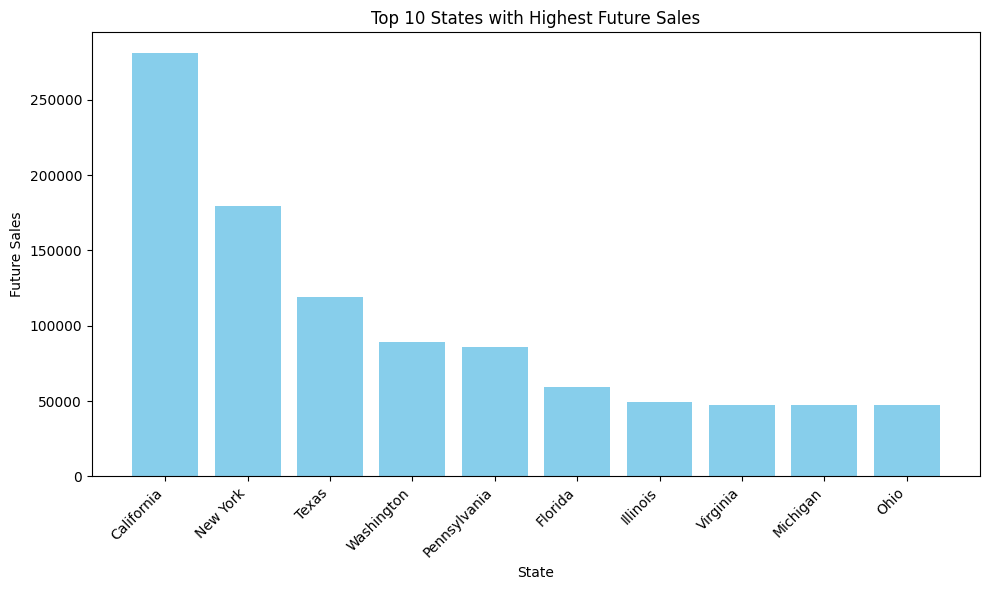

In [38]:
# Sort the DataFrame by 'Future Sales' in descending order
top_states = future_sales_df.sort_values(by='Future Sales', ascending=False)

# Select the top 10 states
top_10_states = top_states.head(10)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_states['State'], top_10_states['Future Sales'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Future Sales')
plt.title('Top 10 States with Highest Future Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

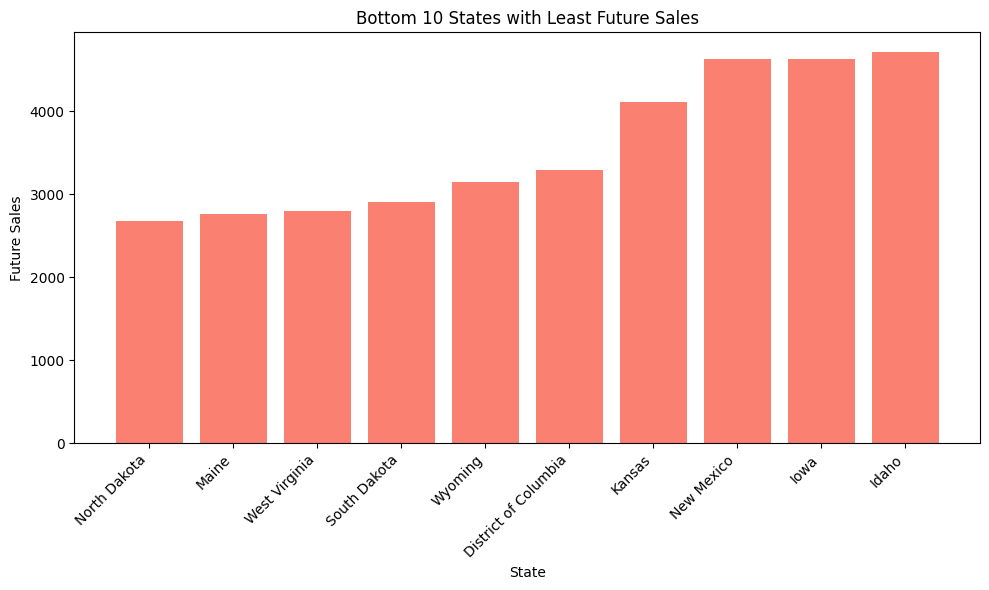

In [39]:
# Sort the DataFrame by 'Future Sales' in ascending order
bottom_states = future_sales_df.sort_values(by='Future Sales', ascending=True)

# Select the bottom 10 states
bottom_10_states = bottom_states.head(10)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(bottom_10_states['State'], bottom_10_states['Future Sales'], color='salmon')
plt.xlabel('State')
plt.ylabel('Future Sales')
plt.title('Bottom 10 States with Least Future Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [40]:
# Grouping data by 'State' and calculating total profit for each state
state_profit = df.groupby('State')['Profit'].sum().reset_index()

# Features and target variable
X = state_profit.drop(['Profit'], axis=1)  # Features (we only have 'State')
y = state_profit['Profit']  # Target variable (total profit)

# Preprocessing: One-hot encode the 'State' column
preprocessor = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), ['State'])], remainder='passthrough')

# Model training
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

model.fit(X, y)  # Train the model

# Future predictions for total profit of each state
future_states = pd.DataFrame({'State': df['State'].unique()})  # All unique states in the dataset
future_profit = model.predict(future_states)  # Predict future profit for each state

# Creating a DataFrame to display the predicted future profit for each state
future_profit_df = pd.DataFrame({'State': future_states['State'], 'Future Profit': future_profit})
print(future_profit_df)

                   State  Future Profit
0               Kentucky    7210.212959
1             California   47012.530091
2                Florida   -1760.956431
3         North Carolina   -4758.239645
4             Washington   21454.232099
5                  Texas  -17402.829426
6              Wisconsin    5838.057352
7                   Utah    2023.693040
8               Nebraska    1785.336851
9           Pennsylvania  -11083.425934
10              Illinois   -6885.520929
11             Minnesota    6367.333456
12              Michigan   15109.439405
13              Delaware    6941.027028
14               Indiana   12541.591256
15              New York   42625.382903
16               Arizona   -1413.572637
17              Virginia   12543.557897
18             Tennessee   -2931.311063
19               Alabama    4180.606243
20        South Carolina    1554.958249
21                Oregon    -442.412427
22              Colorado   -3689.053025
23                  Iowa    1218.162257


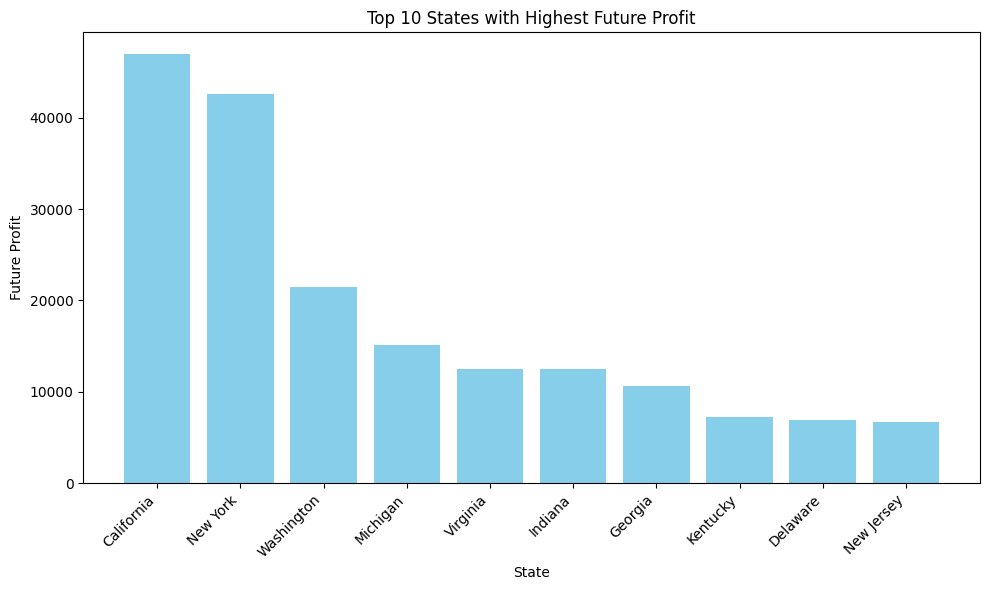

In [41]:
# Sort the DataFrame by 'Future Profit' in descending order
top_states_profit = future_profit_df.sort_values(by='Future Profit', ascending=False)

# Select the top 10 states
top_10_states_profit = top_states_profit.head(10)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_states_profit['State'], top_10_states_profit['Future Profit'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Future Profit')
plt.title('Top 10 States with Highest Future Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

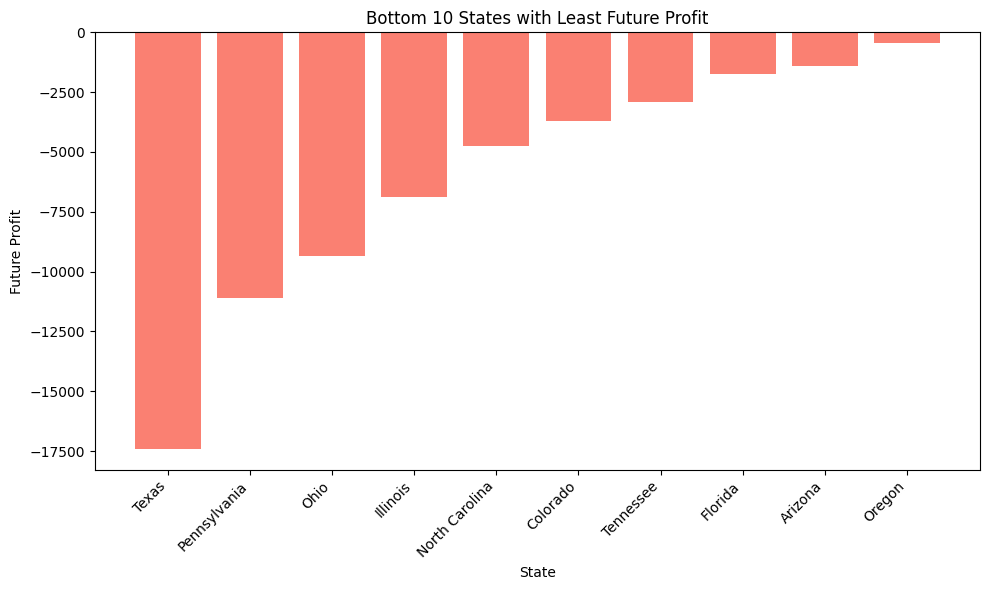

In [42]:
# Sort the DataFrame by 'Future Profit' in ascending order
bottom_states_profit = future_profit_df.sort_values(by='Future Profit', ascending=True)

# Select the bottom 10 states
bottom_10_states_profit = bottom_states_profit.head(10)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(bottom_10_states_profit['State'], bottom_10_states_profit['Future Profit'], color='salmon')
plt.xlabel('State')
plt.ylabel('Future Profit')
plt.title('Bottom 10 States with Least Future Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
# Grouping data by 'State' and calculating total quantity sold for each state
state_quantity = df.groupby('State')['Quantity'].sum().reset_index()

# Features and target variable
X = state_quantity.drop(['Quantity'], axis=1)  # Features (we only have 'State')
y = state_quantity['Quantity']  # Target variable (total quantity sold)

# Preprocessing: One-hot encode the 'State' column
preprocessor = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), ['State'])], remainder='passthrough')

# Model training
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

model.fit(X, y)  # Train the model

# Future predictions for total quantity expected to sell of each state
future_states = pd.DataFrame({'State': df['State'].unique()})  # All unique states in the dataset
future_quantity = model.predict(future_states)  # Predict future quantity expected to sell for each state

# Creating a DataFrame to display the predicted future quantity for each state
future_quantity_df = pd.DataFrame({'State': future_states['State'], 'Future Quantity': future_quantity})
print(future_quantity_df)

                   State  Future Quantity
0               Kentucky           360.76
1             California          4709.58
2                Florida           922.35
3         North Carolina           706.76
4             Washington          1214.99
5                  Texas          2601.33
6              Wisconsin           339.85
7                   Utah           178.74
8               Nebraska           135.95
9           Pennsylvania          1607.05
10              Illinois          1127.52
11             Minnesota           237.11
12              Michigan           612.45
13              Delaware           277.07
14               Indiana           427.91
15              New York          2451.43
16               Arizona           538.93
17              Virginia           624.58
18             Tennessee           468.73
19               Alabama           199.58
20        South Carolina           156.28
21                Oregon           380.39
22              Colorado          

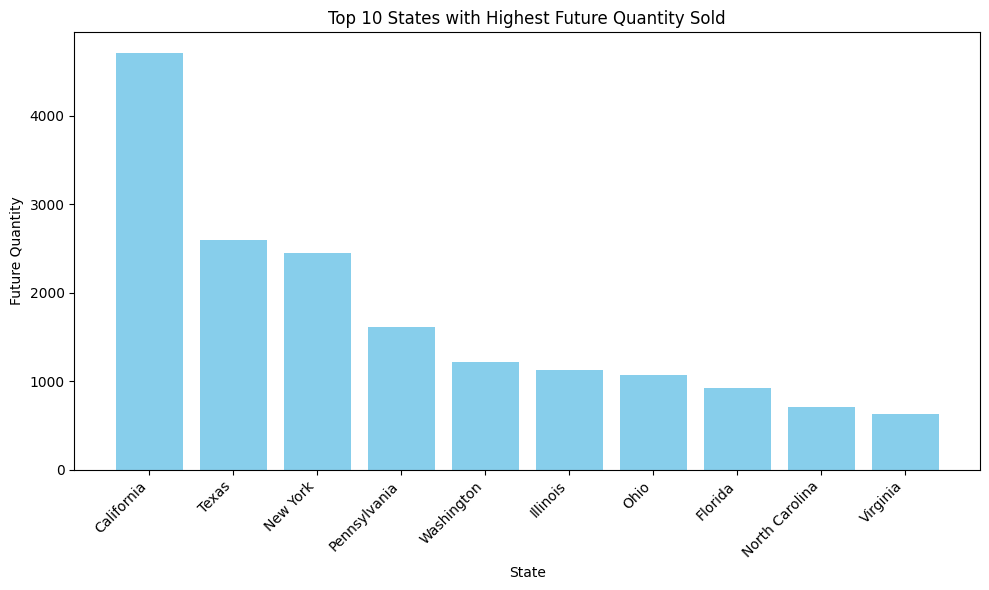

In [44]:
# Sort the DataFrame by 'Future Quantity' in descending order
top_states_quantity = future_quantity_df.sort_values(by='Future Quantity', ascending=False)

# Select the top 10 states
top_10_states_quantity = top_states_quantity.head(10)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_states_quantity['State'], top_10_states_quantity['Future Quantity'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Future Quantity')
plt.title('Top 10 States with Highest Future Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

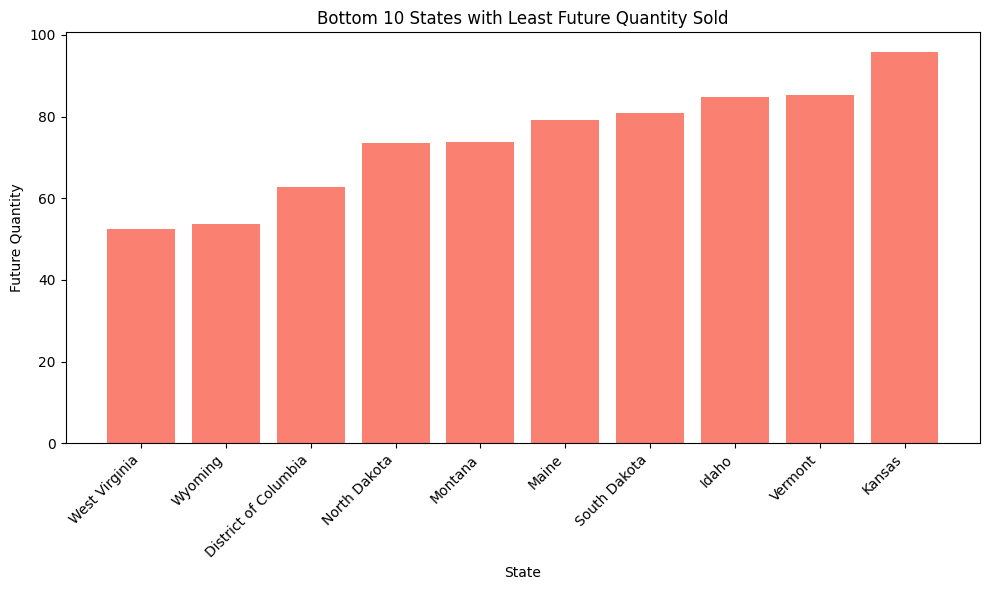

In [45]:
# Sort the DataFrame by 'Future Quantity' in ascending order
bottom_states_quantity = future_quantity_df.sort_values(by='Future Quantity', ascending=True)

# Select the bottom 10 states
bottom_10_states_quantity = bottom_states_quantity.head(10)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(bottom_10_states_quantity['State'], bottom_10_states_quantity['Future Quantity'], color='salmon')
plt.xlabel('State')
plt.ylabel('Future Quantity')
plt.title('Bottom 10 States with Least Future Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



---


## Extra:

While the notebook focused on all the analysis, it's important to emphasize that visualizations played a crucial role in understanding the data. ***Although all the visualizations not included directly in this notebook, some visualizations were conducted in Power BI and will be provided in the accompanying presentation.*** This holistic approach ensures that stakeholders have access to both predictive insights and visually compelling representations, empowering them to make informed decisions and strategies for the future.

In summary, this notebook showcases the power of data analytics and underscores the importance of combining advanced modeling techniques with impactful visualizations for comprehensive data-driven decision-making.